# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

**Import section:** Here I'm going to import the useful modules:

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data.rename(columns={"X": "Age", "Y": "Tardies"}, inplace=True)
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

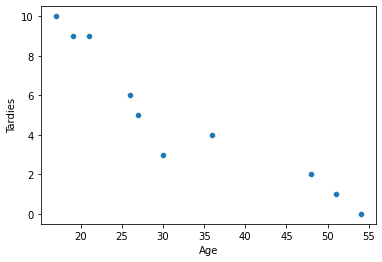

In [8]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**R:** Yes, it looks that as you are older, you tend to arrive just in time. There is an negative regression between age and tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
student_data[["Age", "Tardies"]].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [16]:
student_data[["Age", "Tardies"]].corr(method = 'pearson')

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


**R:** Covariance gives values depending on the data magnitudes. It's better to use the correlation, as it provides information normalised.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [25]:
lr = LinearRegression()
lr.fit(X = student_data[["Age"]], y = student_data.Tardies)

m = lr.coef_[0]
y_intersec = lr.intercept_
print("Slope (m): ", m) 
print("Intersection [Y(X=0)]: ", y_intersec)

student_data["Correlation"] = (student_data.Age * m + y_intersec).round(2)

Slope (m):  -0.2428207709159808
Intersection [Y(X=0)]:  12.888803363135768


**R:** My outcome variable is the number of Tardies, and I'm using a linear negative regression.

Plot your regression model on your scatter plot.

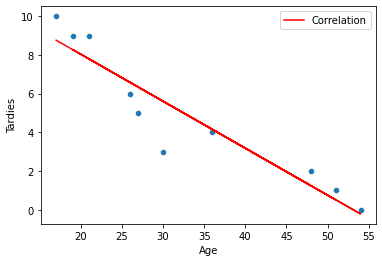

In [28]:
fig, ax = plt.subplots()

sns.scatterplot(x = student_data["Age"], y = student_data["Tardies"])

plt.plot(student_data["Age"], student_data["Correlation"], color='r', label='Correlation')

plt.legend()

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**R:** regarding our model, there is a relation between age and tardiness. Aparently when you are growing up, you arrive just in time, and when you are younger, you arrive late.  
However, I wouldn't trust this model, the dataset was composed by 10 registers, it's not a representative sample, and there are lots of other factors that could influence in the tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [34]:
vehicles = pd.read_csv("vehicles.csv", index_col=0)
vehicles.head()

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

**R:** First I'm going to plot a heatmap to see the possible correlations.  
As we can see, there is an inverse relation between CO2 and Combined MPG.  
Furthermore, there is a very high relation between CO2 and Fuel Barrels/Year and Fuel Cost/Year

<AxesSubplot:>

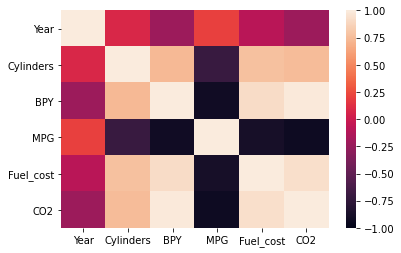

In [48]:
#I'm changing the column names, if not, later is a pain to calculate the regressions with statsmodels
vehicles.rename(columns={"Fuel Barrels/Year": "BPY", "Combined MPG": "MPG", "Fuel Cost/Year": "Fuel_cost", "CO2 Emission Grams/Mile": "CO2"}, inplace=True)

cars = vehicles[["Year", "Cylinders", "BPY", "MPG", "Fuel_cost", "CO2"]]

sns.heatmap(cars.corr(), vmin=-1, vmax=1)

In [49]:
cars[['Year', 'CO2']].corr(method='pearson')

,Year,CO2
Year,1.0000,-0.2223
CO2,-0.2223,1.0000


In [50]:
cars[['Cylinders', 'CO2']].corr(method='pearson')

,Cylinders,CO2
Cylinders,1.000000,0.752393
CO2,0.752393,1.000000


In [51]:
cars[['BPY', 'CO2']].corr(method='pearson')

,BPY,CO2
BPY,1.000000,0.986189
CO2,0.986189,1.000000


In [52]:
cars[['MPG', 'CO2']].corr(method='pearson')

,MPG,CO2
MPG,1.000000,-0.926229
CO2,-0.926229,1.000000


In [53]:
cars[['Fuel_cost', 'CO2']].corr(method='pearson')

,Fuel_cost,CO2
Fuel_cost,1.000000,0.930865
CO2,0.930865,1.000000


**R:** as expected, there is a very strong correlation between CO2 emissions with Fuel Barrels/Year and Fuel Cost/Year. The correlation with Cylinders is also strong as well.  
There is an inverse correlation between CO2 and Combined MPG.  
There isn't any correlation with Years.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

**R:** First, I calculate a individual models comparing CO2 and each of the other columns:

In [54]:
results = smf.ols('CO2  ~ Cylinders', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 4.690e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:35:36   Log-Likelihood:            -2.0784e+05
No. Observations:               35952   AIC:                         4.157e+05
Df Residuals:                   35950   BIC:                         4.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.0946      1.420    127.520      0.000     178.311     183.878
Cylinders     51.0352      0.236    216.569      0.000      50.573      51.497
==============================================================================
Omnibus:                     4434.518   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11452.248
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.382   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
results = smf.ols('CO2  ~ Year', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1869.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:36:35   Log-Likelihood:            -2.2194e+05
No. Observations:               35952   AIC:                         4.439e+05
Df Residuals:                   35950   BIC:                         4.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5725.8633    121.455     47.144      0.000    5487.807    5963.920
Year          -2.6243      0.061    -43.231      0.000      -2.743      -2.505
==============================================================================
Omnibus:                     3079.952   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4482.385
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.053   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
results = smf.ols('CO2  ~ BPY', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:            -1.5821e+05
No. Observations:               35952   AIC:                         3.164e+05
Df Residuals:                   35950   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4865      0.423     29.523      0.000      11.658      13.316
BPY           26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
results = smf.ols('CO2  ~ Fuel_cost', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 2.334e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:37:47   Log-Likelihood:            -1.8665e+05
No. Observations:               35952   AIC:                         3.733e+05
Df Residuals:                   35950   BIC:                         3.733e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5631      0.887     69.430      0.000      59.825      63.301
Fuel_cost      0.2186      0.000    483.072      0.000       0.218       0.220
==============================================================================
Omnibus:                     1566.464   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.699
Skew:                          -0.399   Prob(JB):                    3.65e-288
Kurtosis:                       2.502   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
results = smf.ols('CO2  ~ MPG', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 2.170e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:38:55   Log-Likelihood:            -1.8778e+05
No. Observations:               35952   AIC:                         3.756e+05
Df Residuals:                   35950   BIC:                         3.756e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    905.2031      0.953    950.221      0.000     903.336     907.070
MPG          -21.5706      0.046   -465.877      0.000     -21.661     -21.480
==============================================================================
Omnibus:                    23856.426   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380865.584
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      17.770   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R:** We can see that BPY is the one with R-squared closer to 1, so we take this one. Now we are going to add the other columns to this one and check if the R-squared changes or not.

In [65]:
results = smf.ols('CO2  ~ BPY + Fuel_cost + MPG + Cylinders', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.470e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:48:17   Log-Likelihood:            -1.5226e+05
No. Observations:               35952   AIC:                         3.045e+05
Df Residuals:                   35947   BIC:                         3.046e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.1563      1.688     77.714      0.000     127.848     134.464
BPY           19.6271      0.060    329.809      0.000      19.510      19.744
Fuel_cost      0.0294      0.000     61.102      0.000       0.028       0.030
MPG           -3.1666      0.043    -73.810      0.000      -3.251      -3.082
Cylinders      1.0448      0.080     12.993      0.000       0.887       1.202
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R:** We can see that actually, the R-squared value does not change that much, so to be honest, I would remove the rest of columns and leave only BPY.  
Cylinders coef is very small, and it's not changing the result.  
The P values are smaller than 0.05 for every column in the model, so we can asume the data is representative.

In [68]:
results = smf.ols('CO2  ~ BPY + Fuel_cost + MPG', data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 5.932e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:53:48   Log-Likelihood:            -1.5235e+05
No. Observations:               35952   AIC:                         3.047e+05
Df Residuals:                   35948   BIC:                         3.047e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.6742      1.691     77.861      0.000     128.359     134.989
BPY           19.6955      0.059    331.484      0.000      19.579      19.812
Fuel_cost      0.0317      0.000     70.466      0.000       0.031       0.033
MPG           -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R:** My regression model would result in the following equation:

In [81]:
cars["Model_Y_CO2"] = 19.6955 * cars.BPY + 0.0317 * cars.Fuel_cost -3.1661 * cars.MPG + 131.6742

<ipython-input-81-4a81d4791888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["Model_Y_CO2"] = 19.6955 * cars.BPY + 0.0317 * cars.Fuel_cost -3.1661 * cars.MPG + 131.6742


In [82]:
cars[["Model_Y_CO2", "CO2"]]

,Model_Y_CO2,CO2
Make,,
AM General,521.538074,522.764706
AM General,670.721727,683.615385
AM General,553.326210,555.437500
AM General,670.721727,683.615385
ASC Incorporated,567.591210,555.437500
...,...,...
smart,232.893315,244.000000
smart,232.893315,243.000000
smart,232.893315,244.000000


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

**R:** in order to plot it in a two dimension graph, I'm leaving the regression as:  
$$CO2 = 19.6955 * cars.BPY + 131.6742$$  
As BPY was the most important factor.

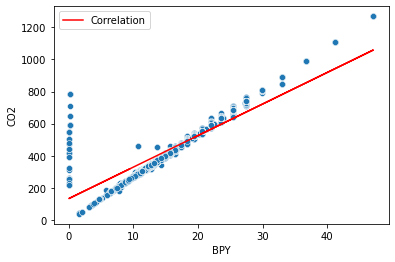

In [84]:
fig, ax = plt.subplots()

sns.scatterplot(x = cars["BPY"], y = cars["CO2"])

plt.plot(cars.BPY, 19.6955 * cars.BPY + 131.6742, color='r', label='Correlation')

plt.legend()

The model is OK, but not perfect, as we can see that there are lots of electric/hybrid cars without CO2 emissions, and their values change the slope of the line.  
The most important factor is Fuel Barrels/Year.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 